## Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np

## Importando datos

In [2]:
url = "https://raw.githubusercontent.com/ASRR7/challenge-machine_learning/refs/heads/main/df_norm.csv"
df = pd.read_csv(url)
df.sample(5)

,SeniorCitizen,tenure,InternetService,OnlineBackup,Contract,PaymentMethod,ChargeMonthly,ChargeTotal,Churn_,Partner_,Dependents_,PhoneService_,MultipleLines_,OnlineSecurity_,TechSupport_,StreamingTV_,StreamingMovies_,PaperlessBilling_,gender_,DeviceProtection_
2107,0,4,Fiber optic,No,Month-to-month,Electronic check,80.35,307.40,1,1,0,1,0,0,0,1,0,1,0,0
109,0,27,Fiber optic,No,Month-to-month,Mailed check,74.40,1972.35,0,1,1,1,0,1,0,0,0,0,1,0
770,0,11,No,No internet service,Two year,Credit card (automatic),19.55,223.15,0,0,0,1,0,0,0,0,0,0,0,0
5376,0,51,DSL,No,Two year,Bank transfer (automatic),34.20,1782.00,0,1,1,0,0,1,1,0,0,0,1,0
6150,0,2,Fiber optic,Yes,Month-to-month,Electronic check,95.65,167.30,1,0,0,1,0,0,0,1,1,0,0,0


In [3]:
df.describe()

,SeniorCitizen,tenure,ChargeMonthly,ChargeTotal,Churn_,Partner_,Dependents_,PhoneService_,MultipleLines_,OnlineSecurity_,TechSupport_,StreamingTV_,StreamingMovies_,PaperlessBilling_,gender_,DeviceProtection_
count,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098,2280.634213,0.257190,0.484106,0.300124,0.902711,0.421770,0.285950,0.289528,0.383927,0.387505,0.593230,0.494289,0.342782
std,0.369074,24.571773,30.129572,2268.632997,0.437115,0.499782,0.458343,0.296371,0.493876,0.451897,0.453575,0.486374,0.487214,0.491265,0.500002,0.474672
min,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.425000,400.225000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.300000,1391.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,55.000000,89.875000,3785.300000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df['OnlineBackup_'] = df['OnlineBackup'].apply(lambda x: 1 if x == 'Yes' else 0)
df = df.drop(columns = ['OnlineBackup'])

## Tratando variables categóricas

In [5]:
from sklearn.preprocessing import OneHotEncoder

In [6]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')
encoded_data = encoder.fit_transform(df[['InternetService']])

In [7]:
new_column_names = encoder.get_feature_names_out(['InternetService'])
encoded_df = pd.DataFrame(encoded_data, columns=new_column_names, index=df.index)

In [8]:
df = pd.concat([df.drop('InternetService', axis=1), encoded_df], axis=1)
df.sample(3) #Si InternetService_Fiberoptic = 0 e InternetService_No = 0 ---> InternetService = DSL

,SeniorCitizen,tenure,Contract,PaymentMethod,ChargeMonthly,ChargeTotal,Churn_,Partner_,Dependents_,PhoneService_,...,OnlineSecurity_,TechSupport_,StreamingTV_,StreamingMovies_,PaperlessBilling_,gender_,DeviceProtection_,OnlineBackup_,InternetService_Fiber optic,InternetService_No
3750,0,28,Month-to-month,Mailed check,49.90,1410.25,0,1,1,1,...,0,0,0,0,0,1,0,0,0.0,0.0
6323,0,52,Month-to-month,Credit card (automatic),83.80,4331.40,0,0,0,1,...,0,0,0,1,1,0,1,0,1.0,0.0
5038,0,4,Month-to-month,Electronic check,91.65,365.40,1,1,0,1,...,0,0,1,0,1,1,0,1,1.0,0.0


In [9]:
encoded_data = encoder.fit_transform(df[['PaymentMethod']])
new_column_names = encoder.get_feature_names_out(['PaymentMethod'])
encoded_df = pd.DataFrame(encoded_data, columns=new_column_names, index=df.index)
df = pd.concat([df.drop('PaymentMethod', axis=1), encoded_df], axis=1)
df.sample(3) #Si no es alguno de estos métodos de pago ---> PaymentMethod = Bank transfer (automatic)

,SeniorCitizen,tenure,Contract,ChargeMonthly,ChargeTotal,Churn_,Partner_,Dependents_,PhoneService_,MultipleLines_,...,StreamingMovies_,PaperlessBilling_,gender_,DeviceProtection_,OnlineBackup_,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3489,0,72,Two year,20.10,1326.25,0,1,1,1,0,...,0,1,1,0,0,0.0,1.0,1.0,0.0,0.0
7158,0,14,One year,54.25,773.20,0,0,0,1,1,...,0,1,1,0,1,0.0,0.0,0.0,0.0,1.0
1264,0,1,Month-to-month,29.15,29.15,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0


In [10]:
encoded_data = encoder.fit_transform(df[['Contract']])
new_column_names = encoder.get_feature_names_out(['Contract'])
encoded_df = pd.DataFrame(encoded_data, columns=new_column_names, index=df.index)
df = pd.concat([df.drop('Contract', axis=1), encoded_df], axis=1)
df.sample(3) #Si no es alguno de estos contratos ---> Contract = Month-to-month

,SeniorCitizen,tenure,ChargeMonthly,ChargeTotal,Churn_,Partner_,Dependents_,PhoneService_,MultipleLines_,OnlineSecurity_,...,gender_,DeviceProtection_,OnlineBackup_,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year
6835,0,2,18.75,53.15,0,0,0,1,0,0,...,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3763,0,4,65.55,237.20,0,0,0,1,1,0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1641,0,57,70.10,3913.30,1,1,1,1,0,1,...,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Limpiando nombres de columnas

In [11]:
df.columns = df.columns.str.replace('_', '')

In [12]:
df.rename(columns={
    'SeniorCitizen': 'senior_citizen',
    'ChargeMonthly': 'charge_monthly',
    'ChargeTotal': 'charge_total',
    'Churn': 'churn',
    'PhoneService': 'phone_service',
    'MultipleLines': 'multiple_lines',
    'OnlineSecurity': 'online_security',
    'TechSupport': 'tech_support',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_movies',
    'PaperlessBilling': 'paperless_billing',
    'DeviceProtection': 'device_protection',
    'OnlineBackup': 'online_backup',
    'InternetServiceFiber optic': 'internet_service_fiber_optic',
    'InternetServiceNo': 'internet_service_no',
    'PaymentMethodCredit card (automatic)': 'payment_method_credit_card',
    'PaymentMethodElectronic check': 'payment_method_electronic_check',
    'PaymentMethodMailed check': 'payment_method_mailed_check',
    'ContractOne year': 'contract_one_year',
    'ContractTwo year': 'contract_two_year'
}, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   senior_citizen                   7267 non-null   int64  
 1   tenure                           7267 non-null   int64  
 2   charge_monthly                   7267 non-null   float64
 3   charge_total                     7256 non-null   float64
 4   churn                            7267 non-null   int64  
 5   Partner                          7267 non-null   int64  
 6   Dependents                       7267 non-null   int64  
 7   phone_service                    7267 non-null   int64  
 8   multiple_lines                   7267 non-null   int64  
 9   online_security                  7267 non-null   int64  
 10  tech_support                     7267 non-null   int64  
 11  streaming_tv                     7267 non-null   int64  
 12  streaming_movies    

In [14]:
df[df['charge_total'].isnull()][['tenure', 'charge_total']] #Los clientes con 0 meses son los que no tienen cargos

,tenure,charge_total
975,0,NaN
1775,0,NaN
1955,0,NaN
2075,0,NaN
2232,0,NaN
2308,0,NaN
2930,0,NaN
3134,0,NaN
3203,0,NaN
4169,0,NaN


In [15]:
df['charge_total'] = df['charge_total'].fillna(0) #Rellenando con 0

In [16]:
df.to_csv('./df_final.csv', index=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   senior_citizen                   7267 non-null   int64  
 1   tenure                           7267 non-null   int64  
 2   charge_monthly                   7267 non-null   float64
 3   charge_total                     7267 non-null   float64
 4   churn                            7267 non-null   int64  
 5   Partner                          7267 non-null   int64  
 6   Dependents                       7267 non-null   int64  
 7   phone_service                    7267 non-null   int64  
 8   multiple_lines                   7267 non-null   int64  
 9   online_security                  7267 non-null   int64  
 10  tech_support                     7267 non-null   int64  
 11  streaming_tv                     7267 non-null   int64  
 12  streaming_movies    

## Correlación de variables

In [17]:
corr_matrix = df.corr()

In [18]:
# Seleccionamos solo la columna 'churn' y la ordenamos de mayor a menor
churn_correlation = corr_matrix['churn'].sort_values(ascending=False)
print(churn_correlation)

churn                              1.000000
internet_service_fiber_optic       0.300949
payment_method_electronic_check    0.294626
charge_monthly                     0.189866
paperless_billing                  0.186666
senior_citizen                     0.146733
streaming_tv                       0.062430
streaming_movies                   0.060586
multiple_lines                     0.039343
phone_service                      0.012571
gender                             0.009555
device_protection                 -0.063452
online_backup                     -0.080163
payment_method_mailed_check       -0.090061
payment_method_credit_card        -0.131085
Partner                           -0.148546
tech_support                      -0.160440
Dependents                        -0.161384
online_security                   -0.166828
contract_one_year                 -0.173958
charge_total                      -0.193345
internet_service_no               -0.224051
contract_two_year               

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

/tmp/ipython-input-21-2778859346.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_correlation.drop('churn'), y=churn_correlation.drop('churn').index, palette='vlag')


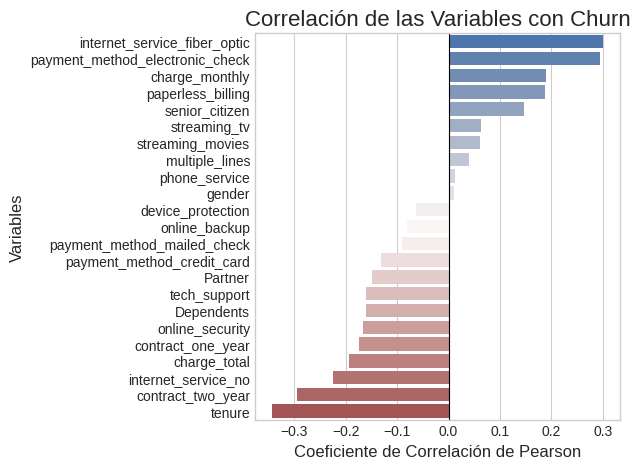

In [21]:
sns.barplot(x=churn_correlation.drop('churn'), y=churn_correlation.drop('churn').index, palette='vlag')

plt.title('Correlación de las Variables con Churn', fontsize=16)
plt.xlabel('Coeficiente de Correlación de Pearson', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.axvline(x=0, color='black', linewidth=0.8) # Línea en cero para referencia
plt.tight_layout()
plt.show()

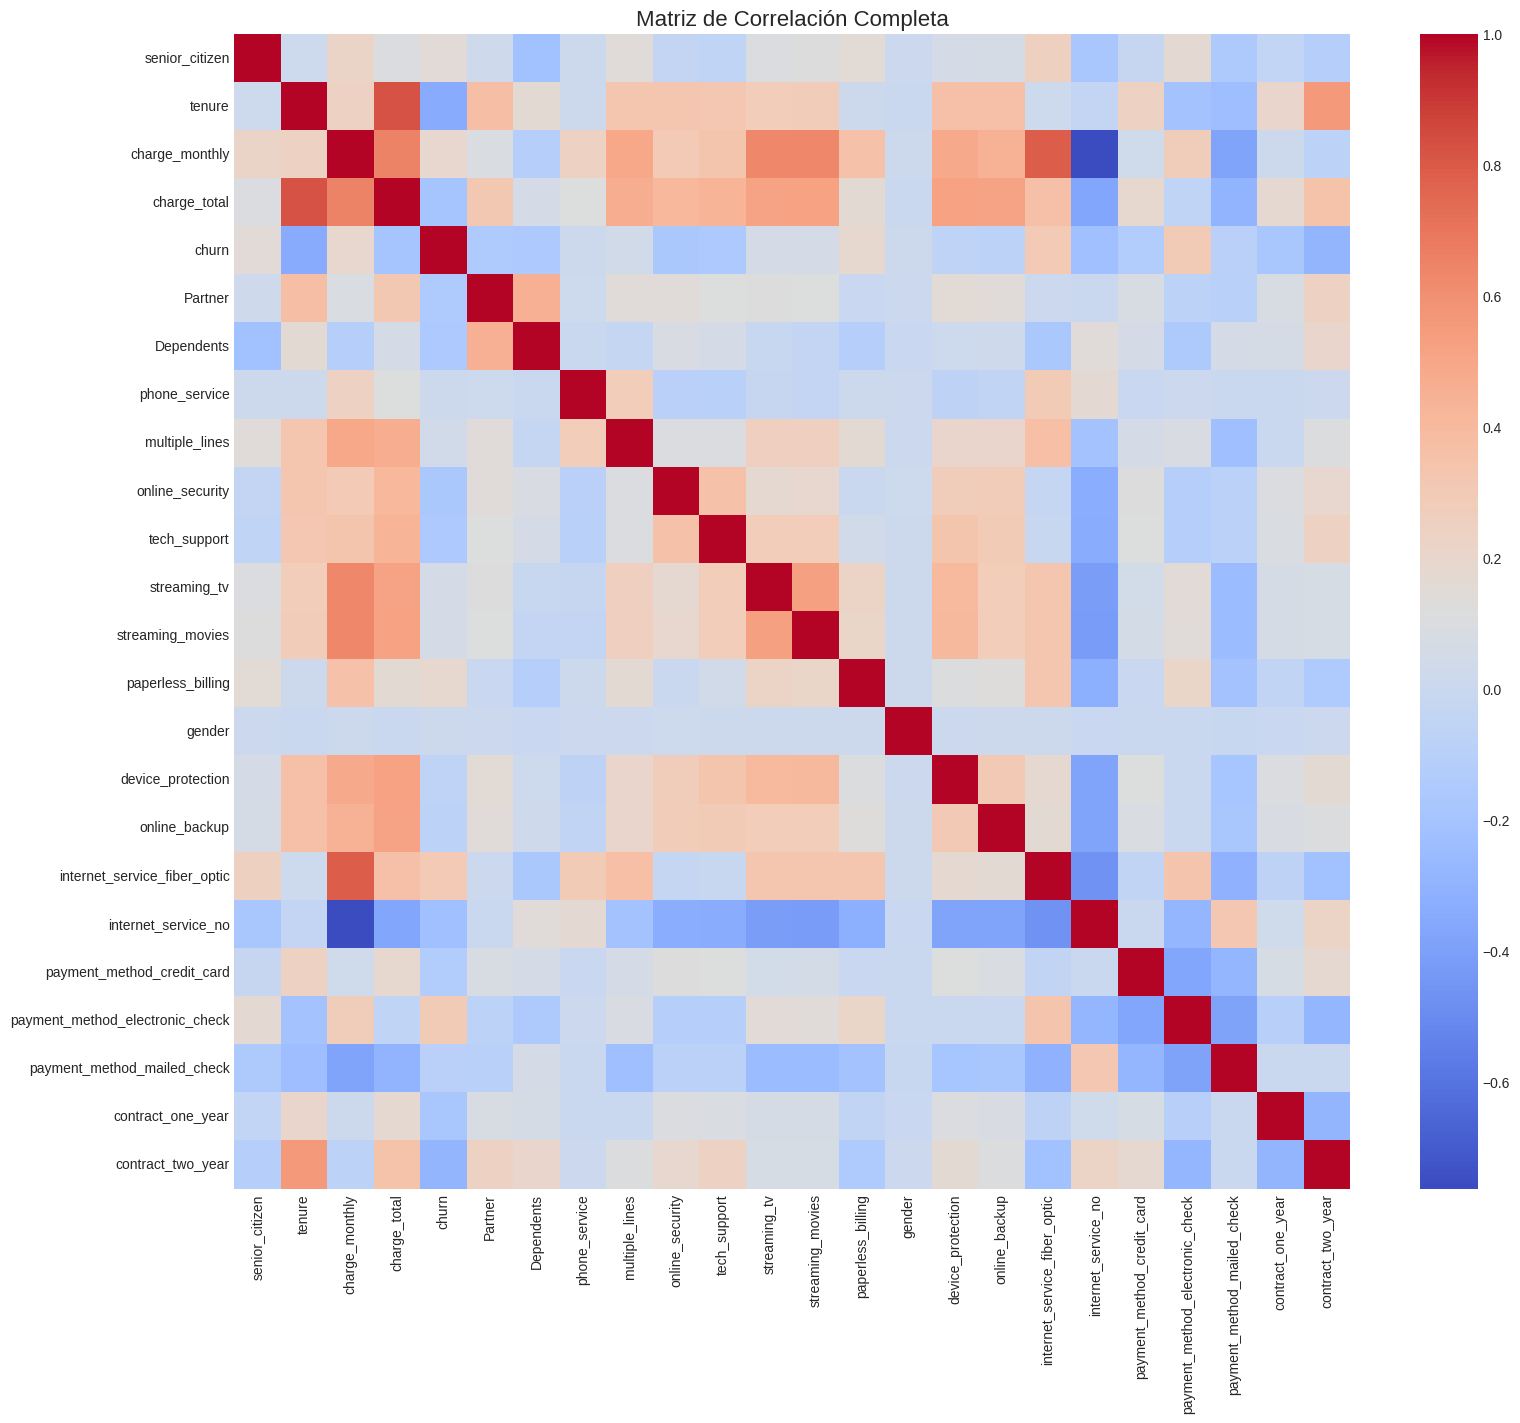

In [22]:
plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False) # annot=True puede ser ilegible con tantas variables
plt.title('Matriz de Correlación Completa', fontsize=16)
plt.show()

### Análisis Antiguedad/Churn

/tmp/ipython-input-23-2530425440.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='tenure', data=df, palette='viridis')


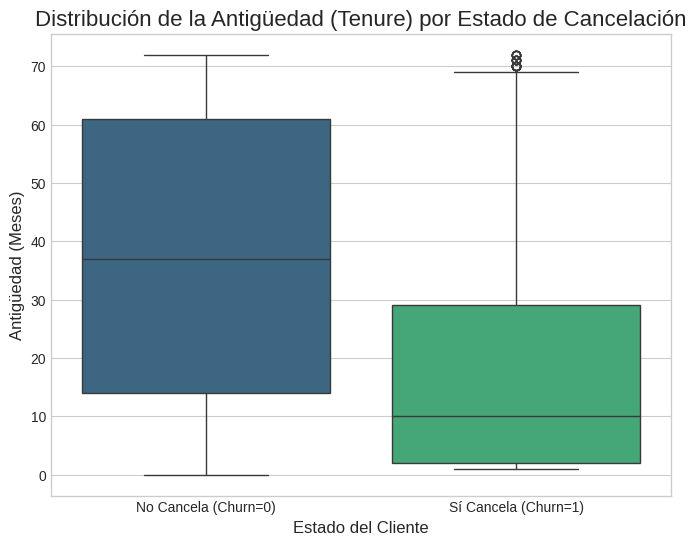

In [23]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(8, 6))

# Crear el boxplot
sns.boxplot(x='churn', y='tenure', data=df, palette='viridis')

# Mejorar la legibilidad del gráfico
plt.title('Distribución de la Antigüedad (Tenure) por Estado de Cancelación', fontsize=16)
plt.xlabel('Estado del Cliente', fontsize=12)
plt.ylabel('Antigüedad (Meses)', fontsize=12)
# Cambiamos las etiquetas del eje X para que sean más claras
plt.xticks([0, 1], ['No Cancela (Churn=0)', 'Sí Cancela (Churn=1)'])

plt.show()

### Análisis Cargo Total/Churn

/tmp/ipython-input-24-794787218.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='charge_total', data=df, palette='plasma')


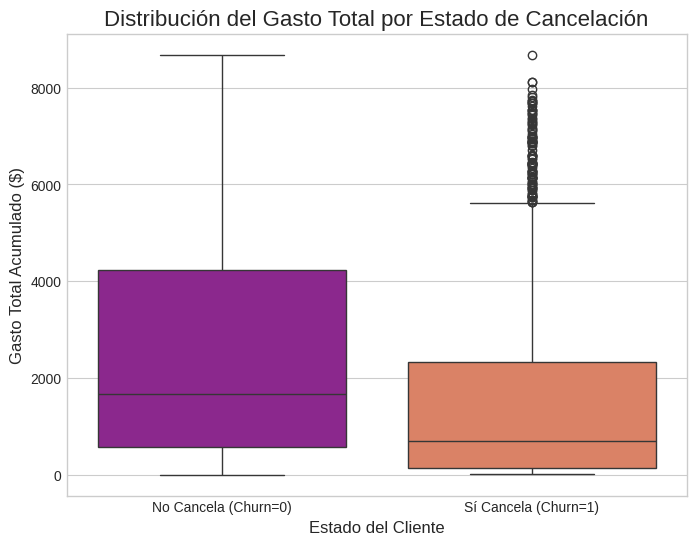

In [24]:
plt.figure(figsize=(8, 6))

# Crear el boxplot
sns.boxplot(x='churn', y='charge_total', data=df, palette='plasma')

# Mejorar la legibilidad del gráfico
plt.title('Distribución del Gasto Total por Estado de Cancelación', fontsize=16)
plt.xlabel('Estado del Cliente', fontsize=12)
plt.ylabel('Gasto Total Acumulado ($)', fontsize=12)
plt.xticks([0, 1], ['No Cancela (Churn=0)', 'Sí Cancela (Churn=1)'])

plt.show()

In [25]:
#Eliminando charge_total por correlación fuerte con tenure
df = df.drop('charge_total', axis=1)

## Creación de conjuntos de entrenamiento y prueba

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = df.drop('churn', axis=1)
y = df['churn'] #Variable objetivo

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### Análisis de variables numéricas

In [29]:
numerical_cols = ['tenure', 'charge_monthly']

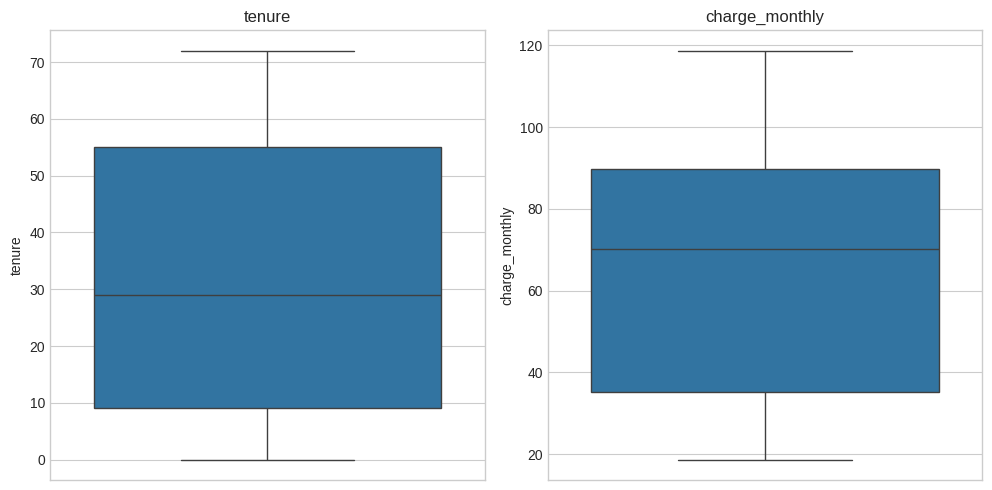

In [30]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=X_train[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### Escalar variables numéricas

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [32]:
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols]) #Entrenando el escalador

In [33]:
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols]) #Escalando con el transformador ya entrenado

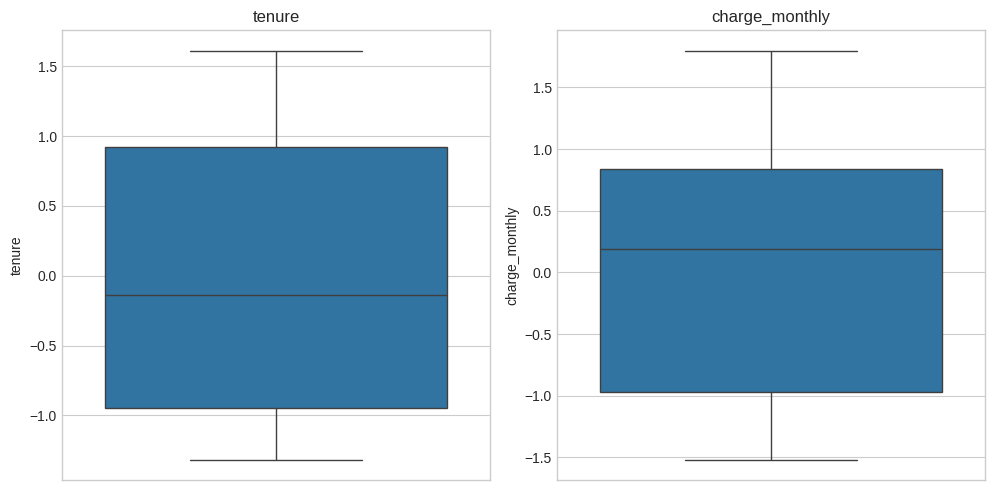

In [34]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=X_train[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### Desbalance de clases

In [35]:
y_train.value_counts() #Hay desbalance de clases

,count
churn,
0,3778
1,1308


In [36]:
print(round(y_train.value_counts(normalize=True) * 100, 2))

churn
0    74.28
1    25.72
Name: proportion, dtype: float64


<Axes: title={'center': 'Distribución de la variable Churn'}, xlabel='churn'>

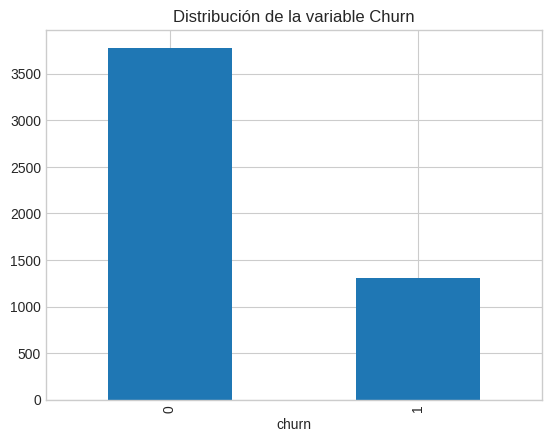

In [37]:
y_train.value_counts().plot(kind='bar', title='Distribución de la variable Churn')

In [38]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

In [39]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [40]:
print(y_train_resampled.value_counts())

churn
0    3778
1    3778
Name: count, dtype: int64


## Entrenamiento de módelos Machine Learning

### Modelo base

In [41]:
from sklearn.dummy import DummyClassifier

In [42]:
modelo_base = DummyClassifier(strategy='most_frequent')
modelo_base.fit(X_train_resampled, y_train_resampled)

DummyClassifier(strategy='most_frequent')

### Regresión Logística

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
model_logistic = LogisticRegression(random_state=42)
model_logistic.fit(X_train_resampled, y_train_resampled)

LogisticRegression(random_state=42)

### KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier()

### Tree Classifier - Unlimited

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
model_tree = DecisionTreeClassifier(random_state=42)
model_tree.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

### Tree Classifier - Limited

In [49]:
model_tree_lim = DecisionTreeClassifier(max_depth=5, random_state=42)
model_tree_lim.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(max_depth=5, random_state=42)

### Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
model_forest = RandomForestClassifier(n_estimators=100, random_state=42)
model_forest.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

### XGBoost Classifier

In [52]:
from xgboost import XGBClassifier

In [53]:
model_xgb = XGBClassifier(random_state=42)
model_xgb.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

## Evaluando modelos

In [54]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [55]:
def conf_matrix(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  print("Matriz de Confusión: ",cm)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
  plt.xlabel('Predicción')
  plt.ylabel('Valor Real')
  plt.title('Matriz de Confusión')
  plt.show()

In [56]:
def roc_eval(y_test, y_pred_proba, auc):
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('Tasa de Falsos Positivos (FPR)')
  plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
  plt.title('Curva Receiver Operating Characteristic (ROC)')
  plt.legend(loc="lower right")
  plt.show()

In [85]:
def evaluar_modelo(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    print(classification_report(y_test, y_pred))
    conf_matrix(y_test, y_pred)
    roc_eval(y_test, y_pred_proba, auc)

In [86]:
modelos = [modelo_base, model_tree, model_tree_lim, model_forest, model_logistic, model_knn, model_xgb]

DummyClassifier(strategy='most_frequent')
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1620
           1       0.00      0.00      0.00       561

    accuracy                           0.74      2181
   macro avg       0.37      0.50      0.43      2181
weighted avg       0.55      0.74      0.63      2181

Matriz de Confusión:  [[1620    0]
 [ 561    0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


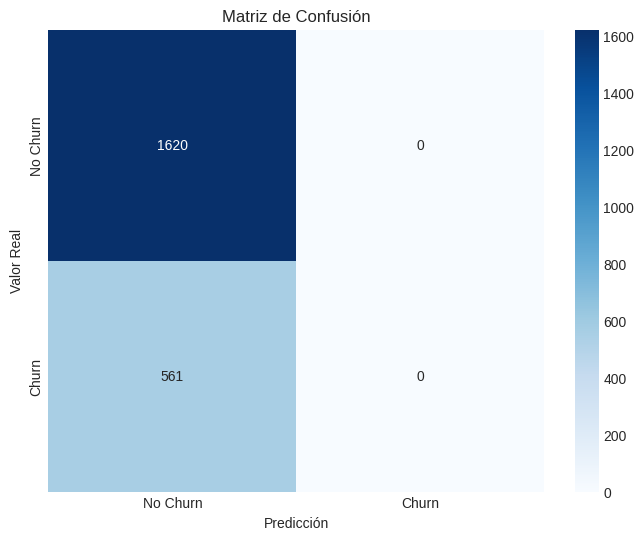

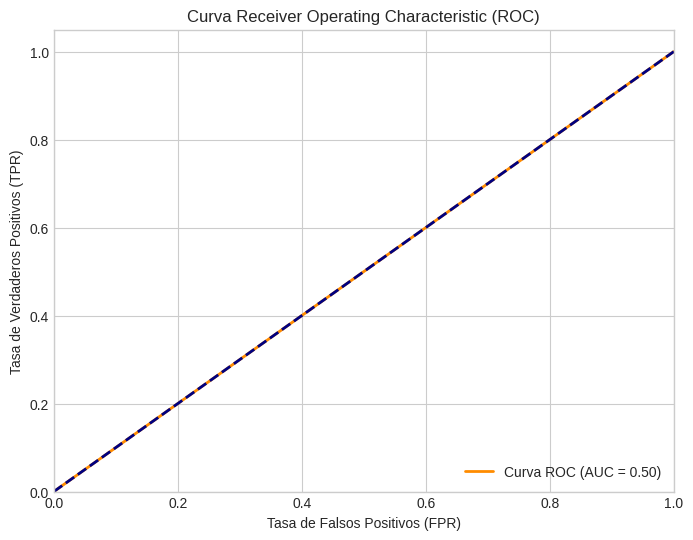


 ###########################################################################

DecisionTreeClassifier(random_state=42)
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1620
           1       0.48      0.51      0.49       561

    accuracy                           0.73      2181
   macro avg       0.65      0.66      0.66      2181
weighted avg       0.74      0.73      0.73      2181

Matriz de Confusión:  [[1306  314]
 [ 274  287]]


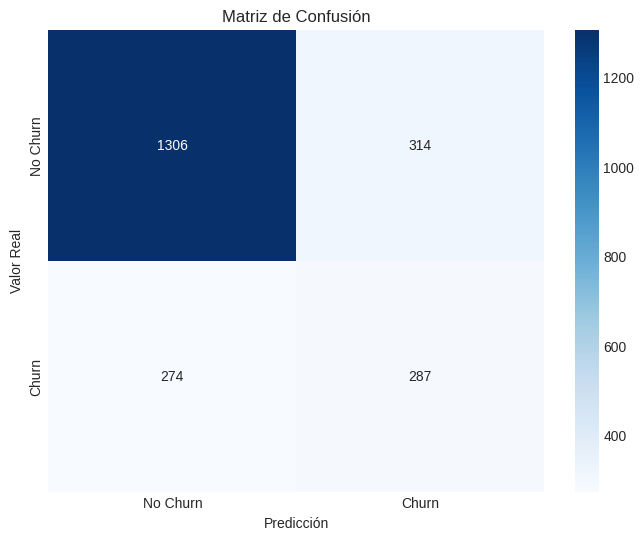

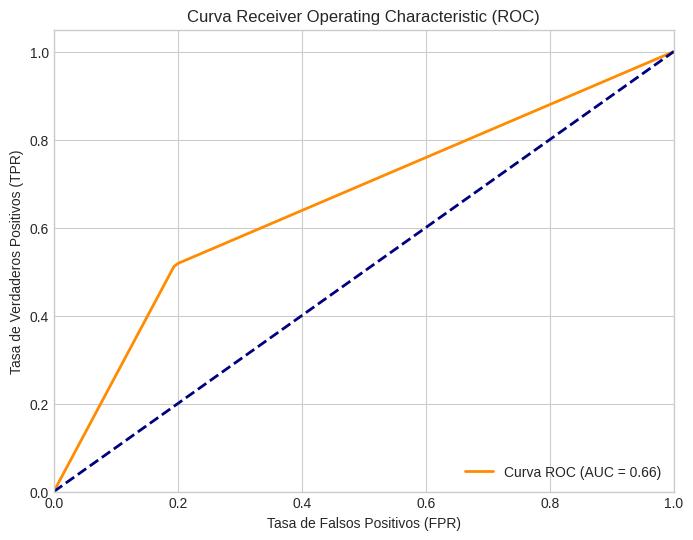


 ###########################################################################

DecisionTreeClassifier(max_depth=5, random_state=42)
              precision    recall  f1-score   support

           0       0.91      0.68      0.78      1620
           1       0.47      0.81      0.60       561

    accuracy                           0.72      2181
   macro avg       0.69      0.75      0.69      2181
weighted avg       0.80      0.72      0.73      2181

Matriz de Confusión:  [[1106  514]
 [ 104  457]]


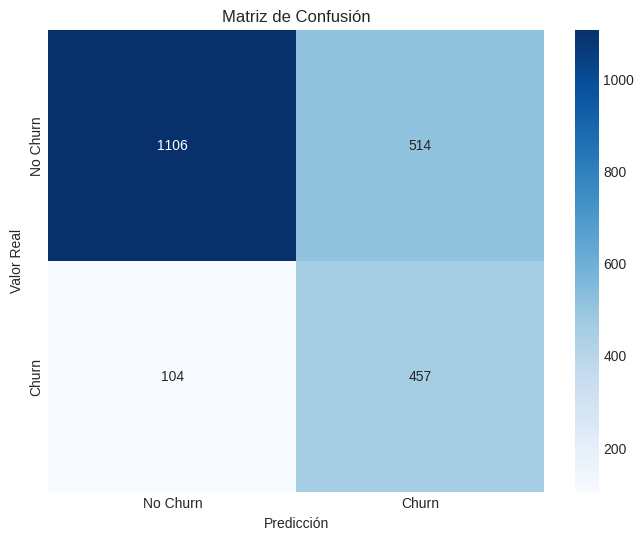

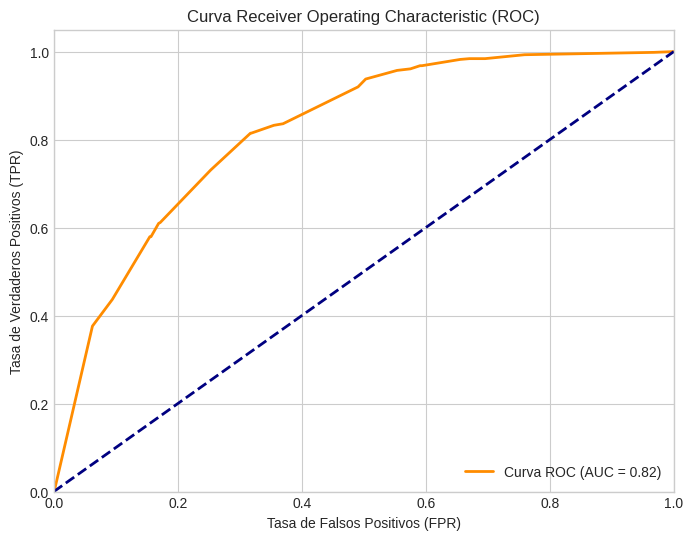


 ###########################################################################

RandomForestClassifier(random_state=42)
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1620
           1       0.56      0.59      0.57       561

    accuracy                           0.77      2181
   macro avg       0.71      0.71      0.71      2181
weighted avg       0.78      0.77      0.78      2181

Matriz de Confusión:  [[1355  265]
 [ 230  331]]


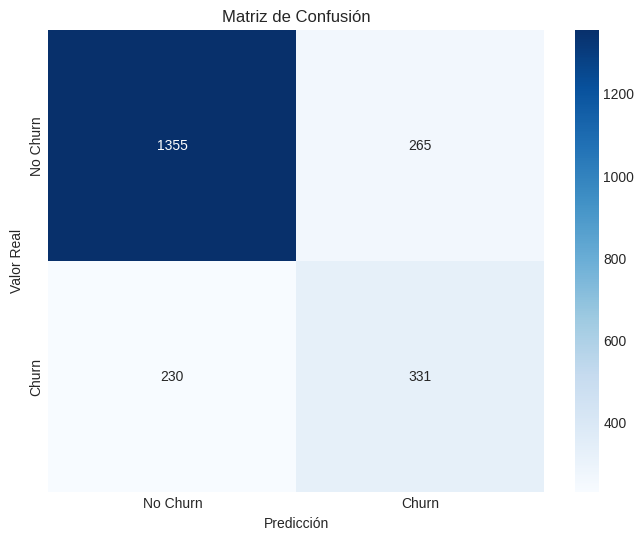

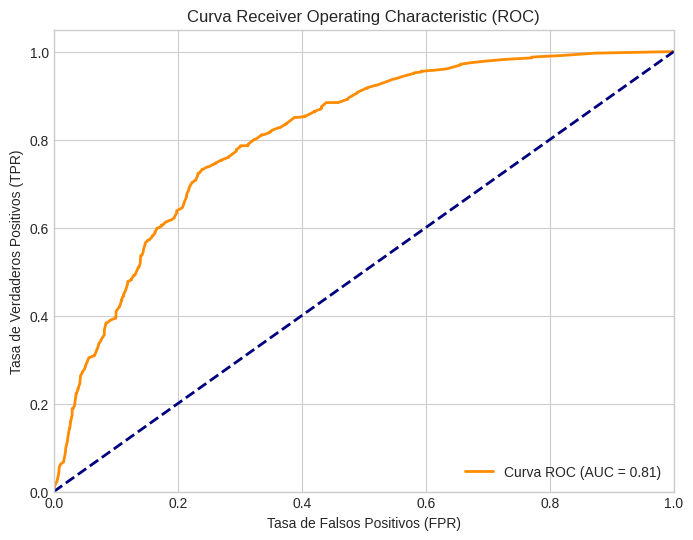


 ###########################################################################

LogisticRegression(random_state=42)
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1620
           1       0.53      0.75      0.62       561

    accuracy                           0.76      2181
   macro avg       0.71      0.76      0.72      2181
weighted avg       0.80      0.76      0.77      2181

Matriz de Confusión:  [[1242  378]
 [ 142  419]]


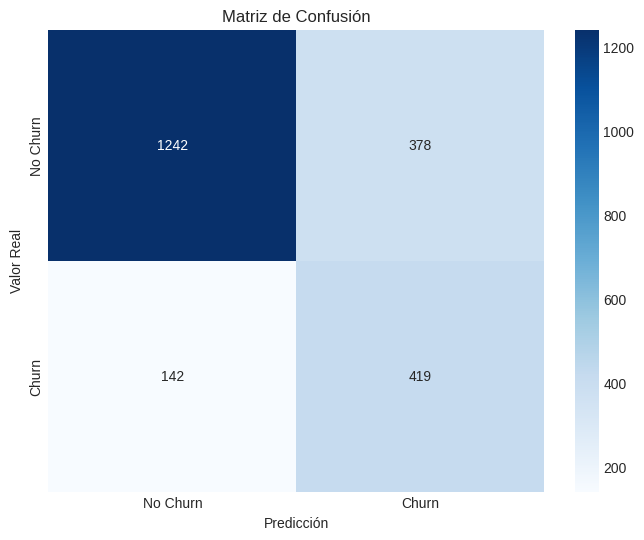

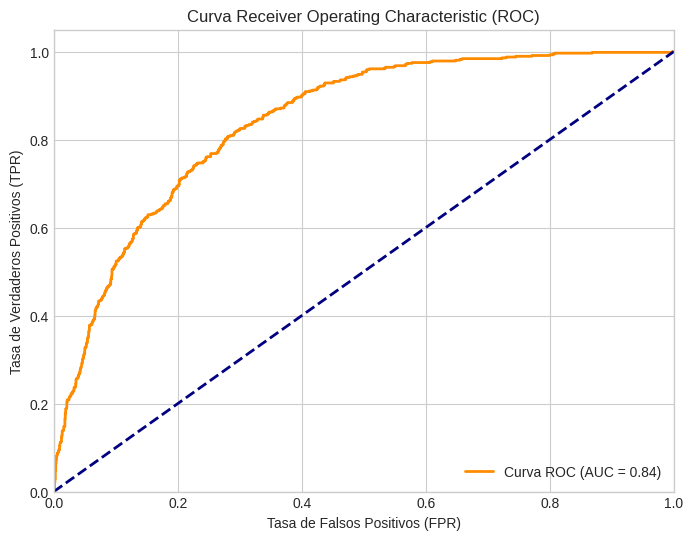


 ###########################################################################

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.88      0.70      0.78      1620
           1       0.45      0.72      0.56       561

    accuracy                           0.71      2181
   macro avg       0.67      0.71      0.67      2181
weighted avg       0.77      0.71      0.72      2181

Matriz de Confusión:  [[1137  483]
 [ 158  403]]


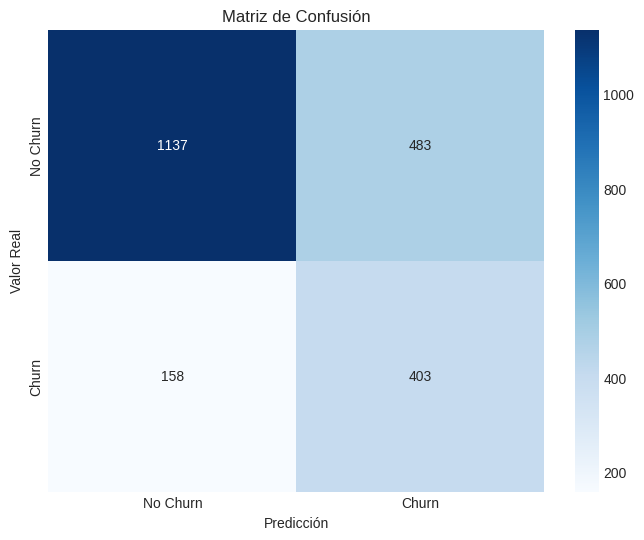

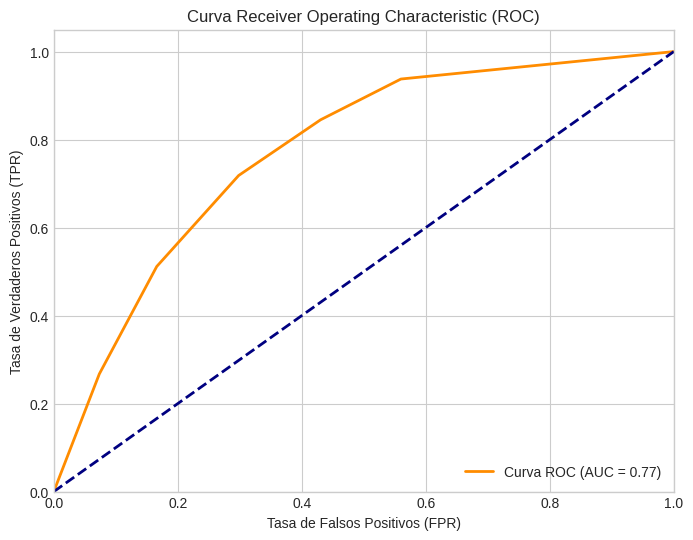


 ###########################################################################

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1620
           1       0.54      0.61      0.57       561

 

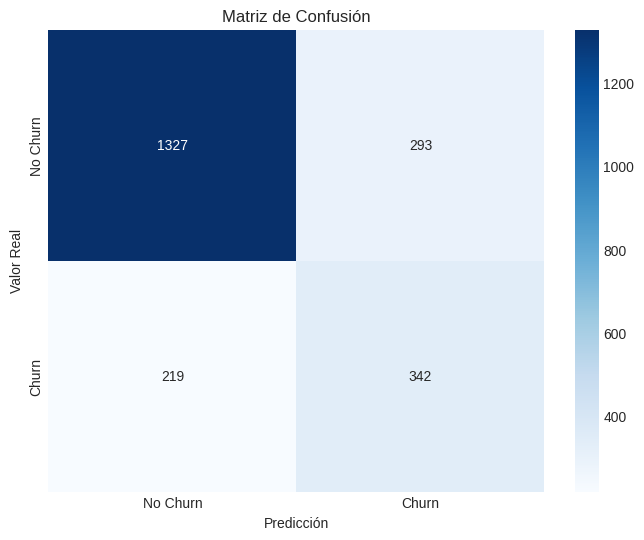

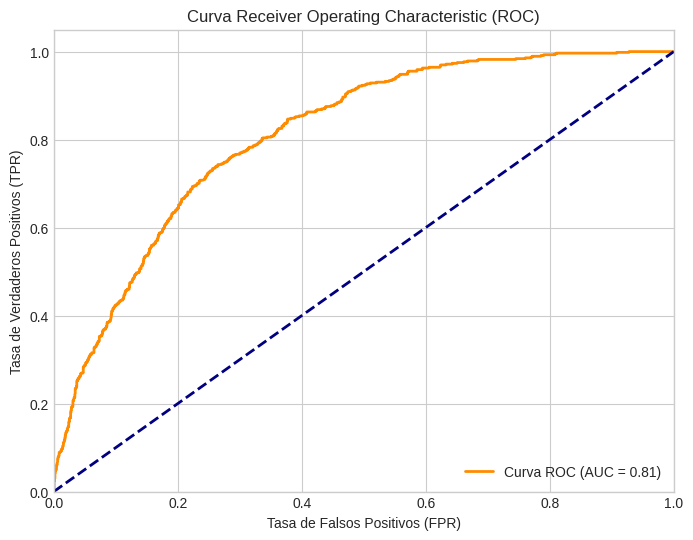


 ###########################################################################



In [87]:
for modelo in modelos:
  print(modelo)
  evaluar_modelo(modelo, X_test, y_test)
  print(f'\n {"#"*75}\n')

Los mejores módelos (recall) fueron:

- Tree     | 0.81
- Logistic | 0.75
- knn      | 0.72
- RandForest| 0.59


### Intentando mejorar **recall**

Es mejor priorizar identificar a los clientes que se van a ir, incluso si eso significa identificar _falsos positivos_ (Clientes que se mantienen), porque se pueden ofrecer descuentos o mejoras al servicio que intentarán evitar el abandono de los clientes.

In [108]:
model_random = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)
model_random.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=20, random_state=42)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1620
           1       0.55      0.59      0.57       561

    accuracy                           0.77      2181
   macro avg       0.70      0.71      0.71      2181
weighted avg       0.78      0.77      0.77      2181

Matriz de Confusión:  [[1348  272]
 [ 231  330]]


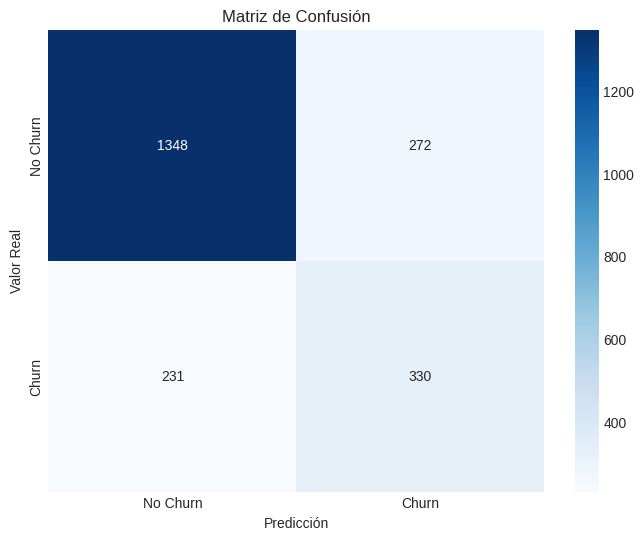

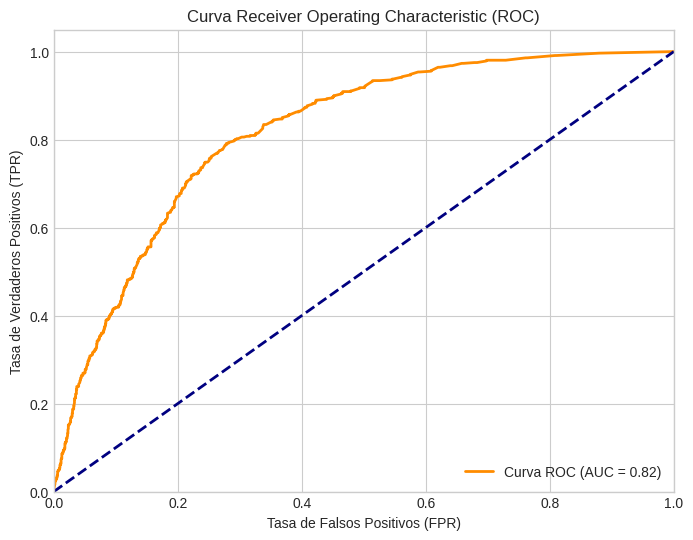

In [109]:
evaluar_modelo(model_random, X_test, y_test)
modelos.append(model_random)

In [110]:
def test_umbrales(modelo, X_test, y_test): #Probando diferentes umbrales de probabilidad
  probabilidades = modelo.predict_proba(X_test)[:, 1] #... para clasificar a los clientes que
  for umbral in [0.5, 0.45, 0.4, 0.35, 0.3, 0.25]: #...abandonan de mejor manera
    y_pred = (probabilidades >= umbral).astype(int) #...aumentando el recall
    print(f'Umbral: {umbral}\n', classification_report(y_test, y_pred))

In [111]:
#Probando el umbral en todos los modelos para encontrar el mejor
#... (En recall sin sacrificar tanta precisión en cada modelo)
for modelo in modelos:
  print(modelo)
  test_umbrales(modelo, X_test, y_test)
  print(f'\n {"#"*75}\n')

DummyClassifier(strategy='most_frequent')
Umbral: 0.5
               precision    recall  f1-score   support

           0       0.74      1.00      0.85      1620
           1       0.00      0.00      0.00       561

    accuracy                           0.74      2181
   macro avg       0.37      0.50      0.43      2181
weighted avg       0.55      0.74      0.63      2181

Umbral: 0.45
               precision    recall  f1-score   support

           0       0.74      1.00      0.85      1620
           1       0.00      0.00      0.00       561

    accuracy                           0.74      2181
   macro avg       0.37      0.50      0.43      2181
weighted avg       0.55      0.74      0.63      2181

Umbral: 0.4
               precision    recall  f1-score   support

           0       0.74      1.00      0.85      1620
           1       0.00      0.00      0.00       561

    accuracy                           0.74      2181
   macro avg       0.37      0.50      0.43   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Umbral: 0.5
               precision    recall  f1-score   support

           0       0.86      0.83      0.85      1620
           1       0.55      0.60      0.58       561

    accuracy                           0.77      2181
   macro avg       0.71      0.72      0.71      2181
weighted avg       0.78      0.77      0.78      2181

Umbral: 0.45
               precision    recall  f1-score   support

           0       0.86      0.80      0.83      1620
           1       0.53      0.63      0.57       561

    accuracy                           0.76      2181
   macro avg       0.69      0.72      0.70      2181
weighted avg       0.78      0.76      0.77      2181

Umbral: 0.4
               precision    recall  f1-score   support

           0       0.88      0.78      0.83      1620
           1       0.52      0.70      0.60       561

    accuracy                           0.76      2181
   macro avg       0.70      0.74      0.71      2181
weighted avg       0.79      0.76 

In [112]:
def evaluar_modelo(model, X_test, y_test, umbral=0.5): #Si el modelo no tiene umbral usa el por defecto
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred = (y_pred_proba >= umbral).astype(int) #Para usar mejor umbral
    auc = roc_auc_score(y_test, y_pred_proba)
    print(classification_report(y_test, y_pred))
    conf_matrix(y_test, y_pred)
    roc_eval(y_test, y_pred_proba, auc)

In [113]:
#Haciendo lista de tuplas con los modelos y su umbral
modelos = [(modelo_base,0.5), (model_tree,0.5), (model_tree_lim, 0.25), (model_forest, 0.3), (model_logistic,0.25), (model_knn,0.45), (model_xgb, 0.25), (model_random, 0.25) ]

DummyClassifier(strategy='most_frequent')
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1620
           1       0.00      0.00      0.00       561

    accuracy                           0.74      2181
   macro avg       0.37      0.50      0.43      2181
weighted avg       0.55      0.74      0.63      2181

Matriz de Confusión:  [[1620    0]
 [ 561    0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


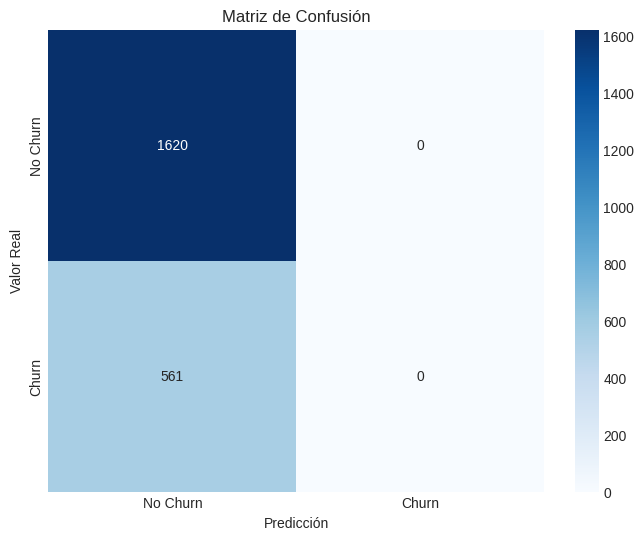

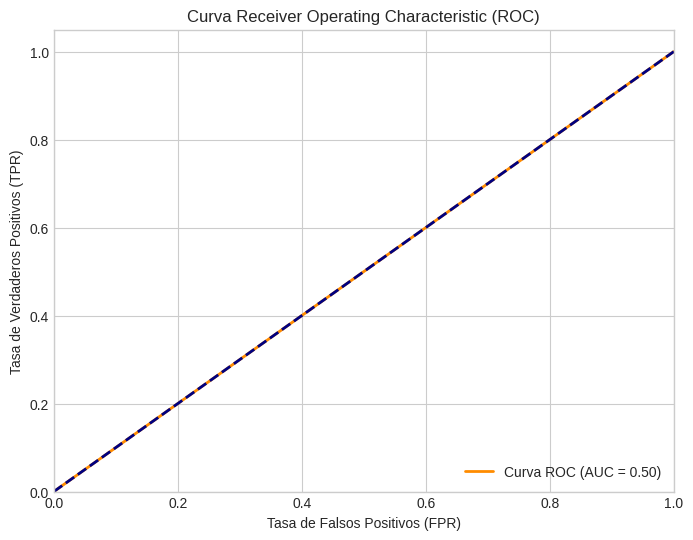


 ###########################################################################

DecisionTreeClassifier(random_state=42)
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1620
           1       0.47      0.52      0.49       561

    accuracy                           0.73      2181
   macro avg       0.65      0.66      0.65      2181
weighted avg       0.74      0.73      0.73      2181

Matriz de Confusión:  [[1295  325]
 [ 270  291]]


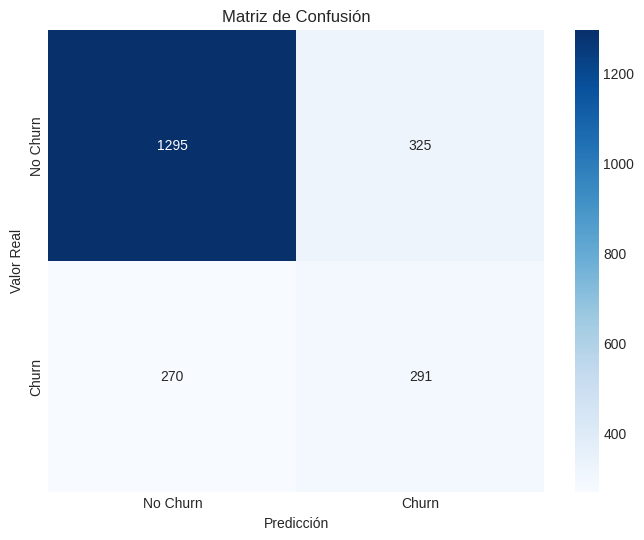

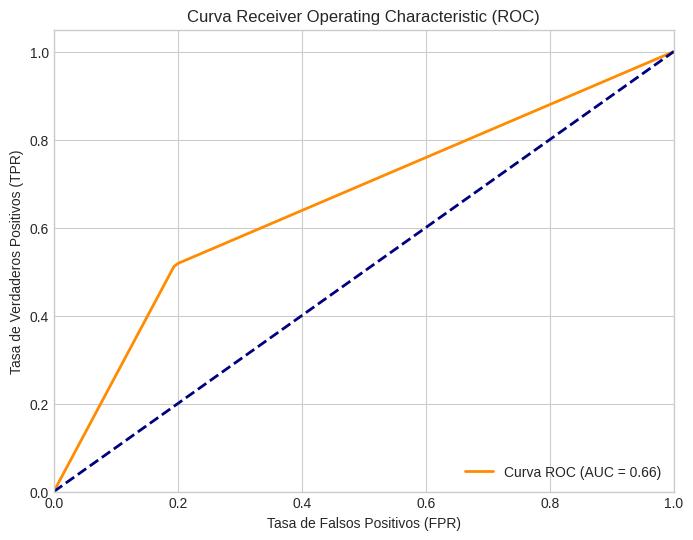


 ###########################################################################

DecisionTreeClassifier(max_depth=5, random_state=42)
              precision    recall  f1-score   support

           0       0.96      0.50      0.65      1620
           1       0.39      0.94      0.55       561

    accuracy                           0.61      2181
   macro avg       0.68      0.72      0.60      2181
weighted avg       0.81      0.61      0.63      2181

Matriz de Confusión:  [[805 815]
 [ 35 526]]


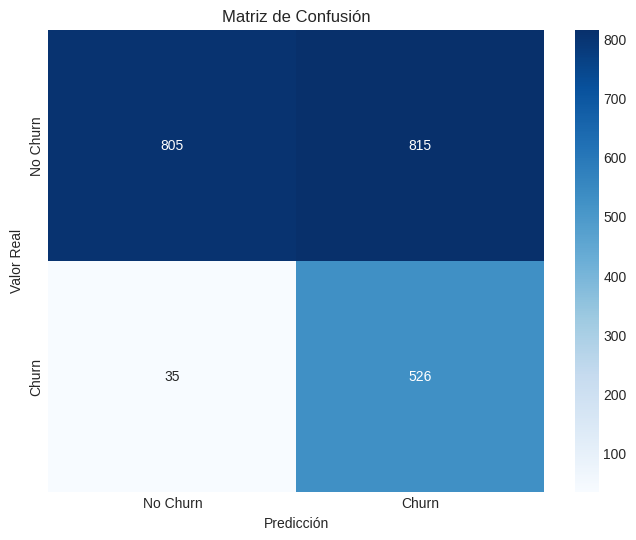

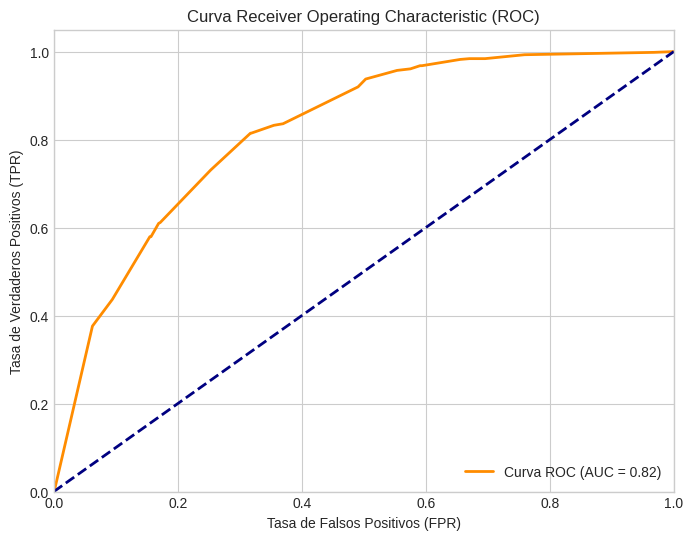


 ###########################################################################

RandomForestClassifier(random_state=42)
              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1620
           1       0.47      0.79      0.59       561

    accuracy                           0.71      2181
   macro avg       0.68      0.74      0.68      2181
weighted avg       0.79      0.71      0.73      2181

Matriz de Confusión:  [[1116  504]
 [ 120  441]]


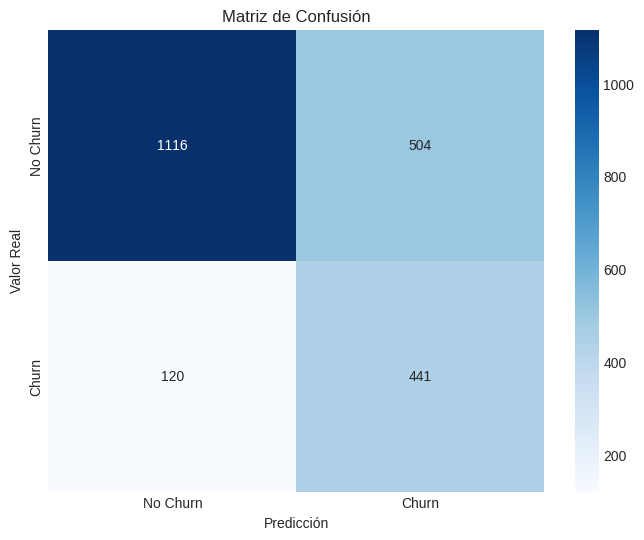

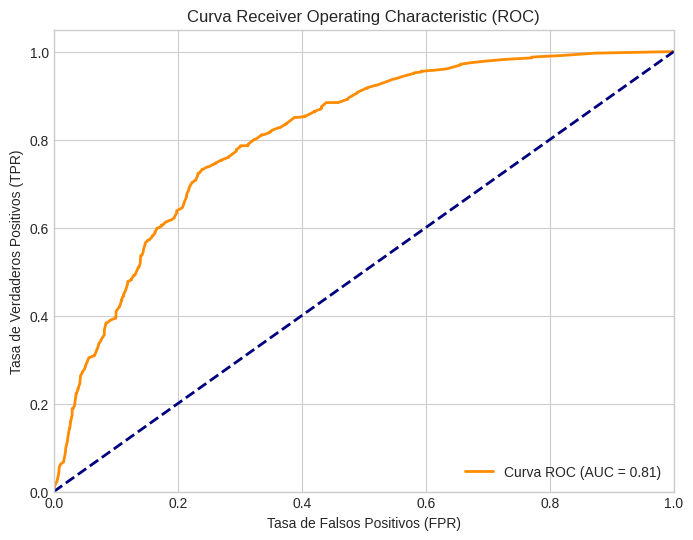


 ###########################################################################

LogisticRegression(random_state=42)
              precision    recall  f1-score   support

           0       0.96      0.55      0.70      1620
           1       0.42      0.93      0.58       561

    accuracy                           0.65      2181
   macro avg       0.69      0.74      0.64      2181
weighted avg       0.82      0.65      0.67      2181

Matriz de Confusión:  [[898 722]
 [ 40 521]]


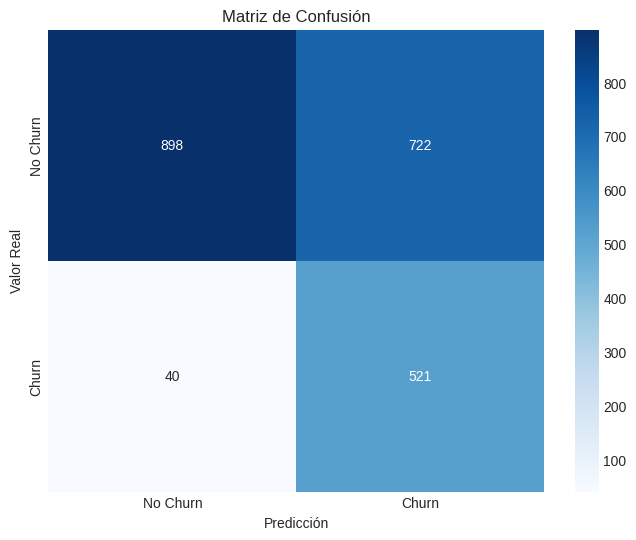

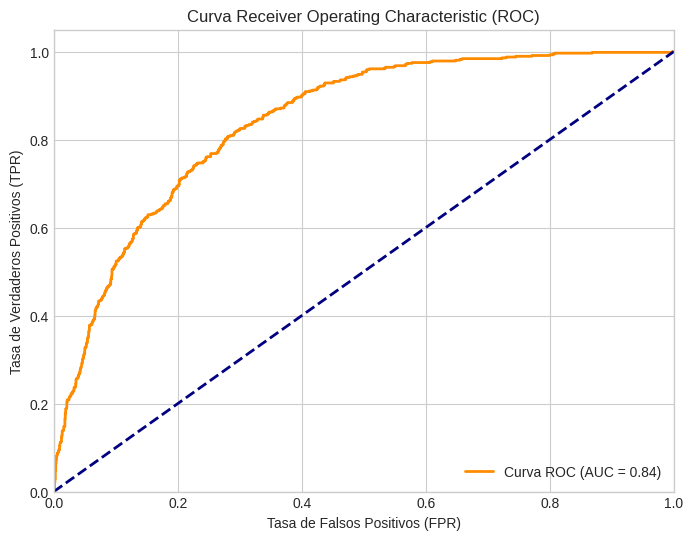


 ###########################################################################

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.88      0.70      0.78      1620
           1       0.45      0.72      0.56       561

    accuracy                           0.71      2181
   macro avg       0.67      0.71      0.67      2181
weighted avg       0.77      0.71      0.72      2181

Matriz de Confusión:  [[1137  483]
 [ 158  403]]


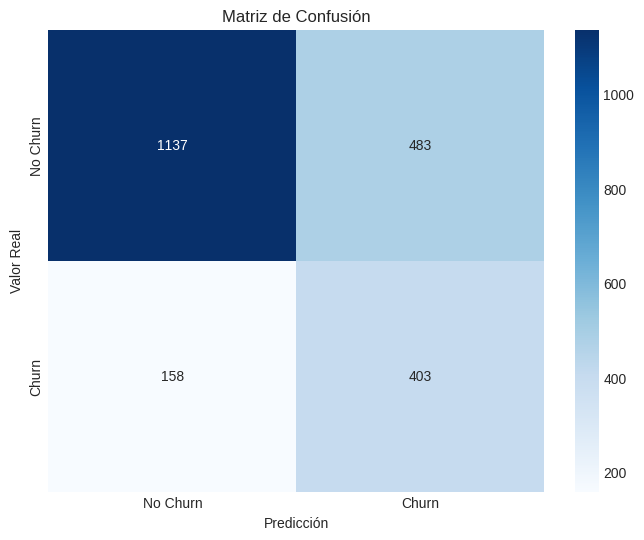

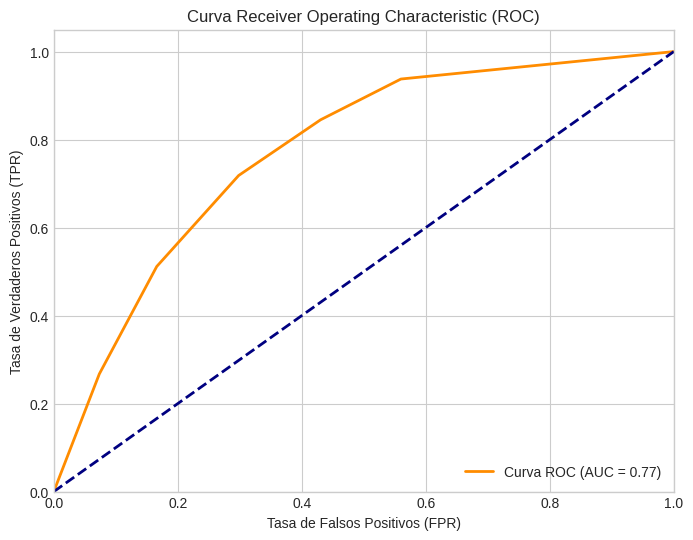


 ###########################################################################

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1620
           1       0.46      0.78      0.58       561

 

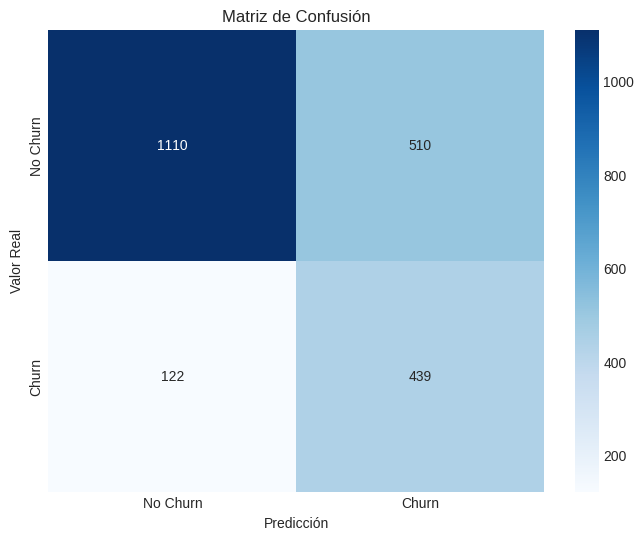

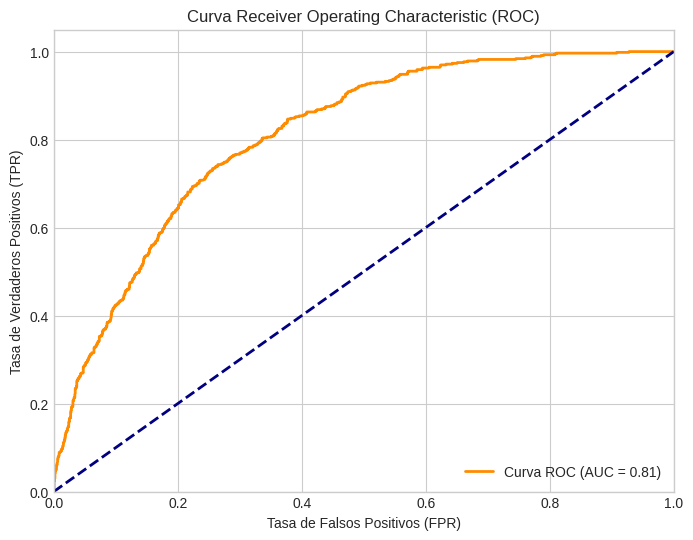


 ###########################################################################

RandomForestClassifier(max_depth=20, random_state=42)
              precision    recall  f1-score   support

           0       0.92      0.62      0.74      1620
           1       0.44      0.85      0.58       561

    accuracy                           0.68      2181
   macro avg       0.68      0.74      0.66      2181
weighted avg       0.80      0.68      0.70      2181

Matriz de Confusión:  [[1007  613]
 [  82  479]]


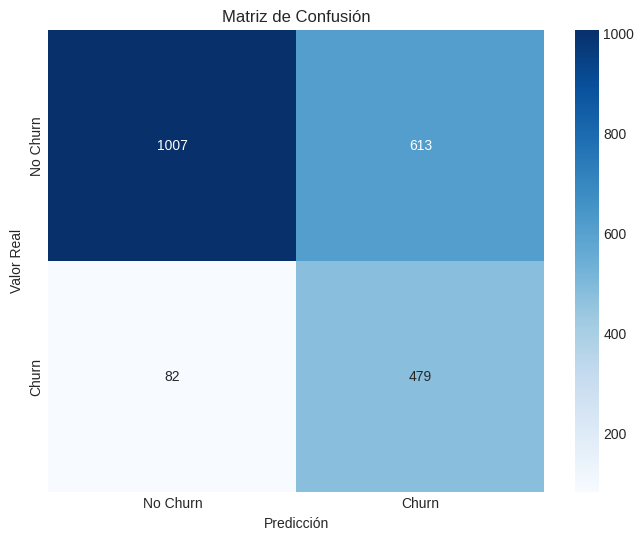

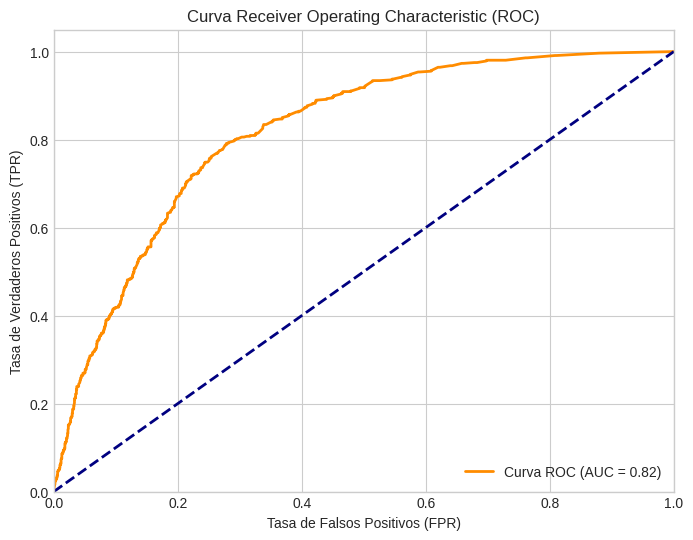


 ###########################################################################



In [114]:
#Evaluar modelos con sus nuevos umbrales:
for modelo,umbral in modelos:
  print(modelo)
  evaluar_modelo(modelo, X_test,y_test,umbral)
  print(f'\n {"#"*75}\n')

### Mejores modelos

Con las modificaciones al umbral se alcanzaron mejores resultados en recall, lo que hace que el modelo identifique a una mayor cantidad de clientes que van a abandonar el servicio.

- **_DecisionTreeClassifier_** profundidad de n=3. Con 35 falsos negativos y 815 falsos positivos. Clasificando correctamente 526 correctos positivos y 805 correctos negativos.

- **_LogisticRegression_**. Con 40 falsos negativos y 722 falsos positivos. Clasificando correctamente 521 correctos positivos y 898 correctos negativos.

- **_RandomForest_**. n_estimators=100, profundidad n=20. Con 82 falsos negativos y 613 falsos negativos. Clasificando correctamente 479 correctos positivos y 1007 correctos negativos.


Con estos modelos se puede implementar una estrategia agresiva para evitar la cancelación de los clientes aunque eso significa tener algunos falsos positivos de clientes que no se iban a ir del servicio.

### Exportando modelo

In [116]:
import pickle

try:
  with open('champion.pkl','wb') as file:
    pickle.dump(model_tree_lim,file)
  print('Modelo serializado con éxito')
except Exception as e:
  print('Se presentó un error al almacenar el modelo: ',str(e))

Modelo serializado con éxito


## Análisis de la importancia de variables

In [117]:
feature_names = X_train.columns

### Tree Classifier

In [118]:
importances_tree = model_tree_lim.feature_importances_
tree_importances = pd.Series(importances_tree, index=feature_names).sort_values(ascending=False)

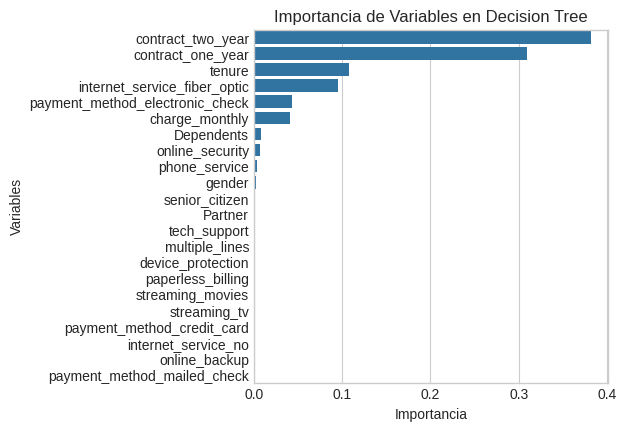

In [119]:
# Gráfico para Decision Tree
sns.barplot(x=tree_importances, y=tree_importances.index)
plt.title('Importancia de Variables en Decision Tree')
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [120]:
print("\nTop 10 variables más importantes para Decision Tree:")
print(tree_importances.head(10))


Top 10 variables más importantes para Decision Tree:
contract_two_year                  0.381847
contract_one_year                  0.310014
tenure                             0.107896
internet_service_fiber_optic       0.094772
payment_method_electronic_check    0.043422
charge_monthly                     0.041028
Dependents                         0.008396
online_security                    0.007249
phone_service                      0.003141
gender                             0.002124
dtype: float64


### Random Forest

In [121]:
importances_rf = model_random.feature_importances_
forest_importances = pd.Series(importances_rf, index=feature_names).sort_values(ascending=False)

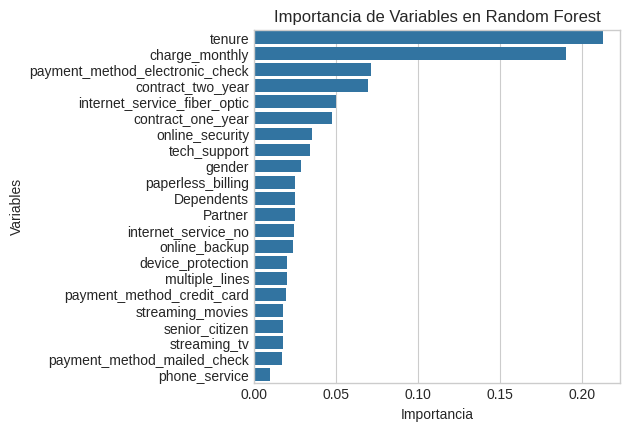

In [122]:
# Gráfico para Random Forest
sns.barplot(x=forest_importances, y=forest_importances.index)
plt.title('Importancia de Variables en Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [123]:
# Imprimir las 10 más importantes
print("Top 10 variables más importantes para Random Forest:")
print(forest_importances.head(10))

Top 10 variables más importantes para Random Forest:
tenure                             0.212266
charge_monthly                     0.190196
payment_method_electronic_check    0.071118
contract_two_year                  0.069177
internet_service_fiber_optic       0.049685
contract_one_year                  0.047278
online_security                    0.035440
tech_support                       0.033794
gender                             0.028368
paperless_billing                  0.024993
dtype: float64


### LogisticRegression

In [124]:
coefficients = model_logistic.coef_[0]

In [125]:
logistic_importances = pd.DataFrame(data={
    'Variable': X_train.columns,
    'Coeficiente': coefficients
})

In [126]:
logistic_importances['Importancia'] = np.abs(logistic_importances['Coeficiente']) #Orden por importancia
logistic_importances = logistic_importances.sort_values(by='Importancia', ascending=False)

In [127]:
colors = ['red' if c > 0 else 'blue' for c in logistic_importances['Coeficiente']]

/tmp/ipython-input-128-2369677949.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coeficiente', y='Variable', data=logistic_importances, palette=colors)


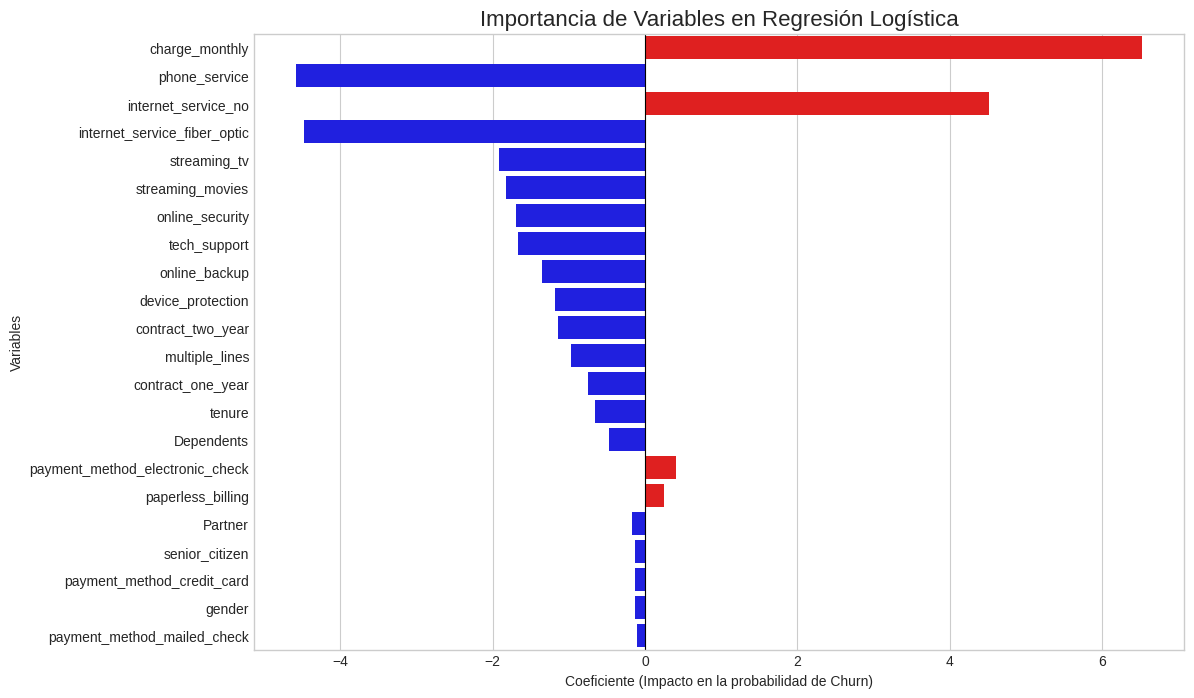

In [128]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Coeficiente', y='Variable', data=logistic_importances, palette=colors)
plt.title('Importancia de Variables en Regresión Logística', fontsize=16)
plt.xlabel('Coeficiente (Impacto en la probabilidad de Churn)')
plt.ylabel('Variables')
plt.axvline(x=0, color='black', linewidth=0.8)
plt.show()

In [129]:
# Imprimir las 10 más importantes
print("Top 10 variables más importantes para Regresión Logística:")
print(logistic_importances.head(10))

Top 10 variables más importantes para Regresión Logística:
                        Variable  Coeficiente  Importancia
2                 charge_monthly     6.523645     6.523645
5                  phone_service    -4.579672     4.579672
16           internet_service_no     4.519184     4.519184
15  internet_service_fiber_optic    -4.481740     4.481740
9                   streaming_tv    -1.920692     1.920692
10              streaming_movies    -1.827670     1.827670
7                online_security    -1.692418     1.692418
8                   tech_support    -1.670117     1.670117
14                 online_backup    -1.357125     1.357125
13             device_protection    -1.178064     1.178064


## **Conclusiones**

<hr> <br>

### Modelo ganador
El mejor modelo fue _DecisionTree_, con parámetro `max_depth=5`, logrando un recall de 94% en la clasificación de clientes que posiblemente abandonarán, aunque sacrificando la presición con solo 39%. Este modelo prioriza clasificar correctamente a los clientes que abandonarán, por lo que al implementarlo se pueden obtener resultados muy rápidos para identificar a clientes en potencial abandono y utilizar estrategias como descuentos, mejora del servicio, entre otras, que logren evitar el abandono del cliente.

_El modelo fue serializado para ser utilizado:_ `champion.pkl`

<hr> <br>

### Variables a considerar
Para el mejor modelo las variables más importantes fueron:

- contract_two_year                 || **0.381847**
- contract_one_year                 || **0.310014**
- tenure                            || **0.107896**
- internet_service_fiber_optic      || **0.094772**

Con estas cuatro variables se forma un 89.45%

<br>

Esto también se confirma al analizar las variables más importantes para _RandomForest_:

- _**tenure**_                       || **0.212266**
- charge_monthly                     || **0.190196**
- payment_method_electronic_check    || **0.071118**
- _**contract_two_year**_            || **0.069177**
- _**internet_service_fiber_optic**_ || **0.049685**
- _**contract_one_year**_            || **0.047278**

Con estas seis variables se forma un 63.97%, entre las que se encuentran las mismas cuatro variables del modelo _DecisionTree_.

<br>

Con lo anterior podemos observar que los más fuertes indicadores de abandono son _tenure_, *contract_one_year* y *contract_two_year*. Esto resulta evidente, pues si los clientes tiene contratos a uno o dos años, no pueden cancelar el servicio a diferencia de los que tienen contrato mensual.

Esto también se relaciona con _tenure_ pues con el tiempo se va formando la lealtad y es más dificil que los clientes cambien del servicio al que ya están acostumbrados.
<br>

Gracias al modelo de regresión logística podemos observar que *charge_monthly* y *internet_service_no* son los mayores factores de riesgo para el abandono.
Podemos interpretar que *charge_monthly* influye bastante porque los clientes buscan la mejor calidad que les pueda ofrecer un precio, y al incrementar los costos del servicio buscarán que la calidad también aumente.

Para el *internet_service_no* que es el segundo mayor factor de riesgo de abandono podemos ayudarnos de otros servicios que tienen factores negativos (influyen a que el cliente no cancele), como por ejemplo: *phone_service*, *streaming_tv*, *streaming_movies*, *online_security*, *tech_support*, entre otros.
Esto podría representar que a los clientes que tienen una mayor cantidad de servicios es más dificil el abandonar el servicio, mientras que a los clientes que no tienen internet (y por ende tampoco todos los servicios extras) es más fácil que abandonen pues solamente tienen el servicio de teléfono.

<hr> <br>

### Estrategias a implementar para mitigar el abandono


1. Como primera estrategia y evitar que más clientes abandonen, se debe de utilizar el modelo serializado en la base de datos de los clientes que todavía están activos para hacer un análisis e identificar a los posibles clientes que tienen posibilidades de abandonar e intentar mejorar el servicio, así como ofrecer promociones o descuentos a sus facturas al incluir servicios extras, ya que como anteriormente se mencionó, *charge_monthly* es de los puntos más influyentes para el abandono.

<br>

2. Una vez manejados a los clientes ya existentes que pueden abandonar, se debe de implementar una estrategia que atienda a los potenciales nuevos clientes. Para ello se debe de ofrecer promociones o beneficios al contratar el servicio en períodos de uno o dos años, esto para lograr crear una lealtad del cliente y hacer que sea menos probable su abandono. Del mismo modo, incluir descuentos al contratar una mayor cantidad de servicios porque como se ha visto, el tener una mayor cantidad de servicios reduce la probabilidad de abandono.

<br>

3. Aunque las estrategias anteriores sean de utilidad para disminuir el abandono tanto de los clientes actuales como de los futuros, también se tendría que hacer un análisis que incluya los factores económicos para saber si el ofrecer mejores servicios, descuentos y promociones es viable financieramente, puesto que la cantidad de clientes que cancelan es pequeña comparado con la cantidad de clientes que se mantienen. Sin embargo, también puede ser una oportunidad de ofrecer mejores servicios que no solo hagan que los clientes ya existentes eviten cancelar, sino también que al mejorar la reputación y visibilidad de un buen servicio sea de utilidad para atraer a nuevos clientes.